# Libraries and drive

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

# DB Scan 2013 - Freedom

In [85]:
freedom_cleaned=pd.read_csv('/content/drive/MyDrive/DS LAB - Colombaro, Ferretti, Fracchia, Salvatori/PROCESSED DATASETS/Happiness + Freedom/freedom_cleaned.csv')
freedom_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country name                               1338 non-null   object 
 1   Region                                     1338 non-null   object 
 2   C/T                                        1338 non-null   object 
 3   Edition                                    1338 non-null   int64  
 4   Status                                     1338 non-null   object 
 5   PR rating                                  1338 non-null   int64  
 6   CL rating                                  1338 non-null   int64  
 7   A1                                         1338 non-null   int64  
 8   A2                                         1338 non-null   int64  
 9   A3                                         1338 non-null   int64  
 10  A                       

In [86]:
f_2013 = freedom_cleaned[freedom_cleaned['Edition']==2013]
f_2013.info()
f_2013.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 1328
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country name                               135 non-null    object 
 1   Region                                     135 non-null    object 
 2   C/T                                        135 non-null    object 
 3   Edition                                    135 non-null    int64  
 4   Status                                     135 non-null    object 
 5   PR rating                                  135 non-null    int64  
 6   CL rating                                  135 non-null    int64  
 7   A1                                         135 non-null    int64  
 8   A2                                         135 non-null    int64  
 9   A3                                         135 non-null    int64  
 10  A                        

Country name       0
Region             0
C/T                0
Edition            0
Status             0
                  ..
iso_3166-2         1
region             1
sub-region         1
region-code        1
sub-region-code    1
Length: 76, dtype: int64

In [87]:
# Dropping columns with null values
f_2013.dropna(axis=0, how= 'any', inplace=True)

<ipython-input-87-a4518019a0b9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
# Selecting columns of interest
f_2013_freedom = f_2013[['Country name', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'PR', 'CL', 'Total', 'Status']]
f_2013_freedom.reset_index(inplace=True)

f_2013_subset=f_2013[['Country name', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Total']]
f_2013_subset.set_index('Country name', inplace=True)

In [89]:
# Standardize
from sklearn.preprocessing import StandardScaler


num_col = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Total']
scaler = StandardScaler()
for i in num_col:
  f_2013_subset[[i]] = scaler.fit_transform(f_2013_subset[[i]])


<ipython-input-89-194b858d3198>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-89-194b858d3198>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-89-194b858d3198>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-89-194b858

In [90]:

f_2013_subset
f_2013_subset2=f_2013_subset
f_2013_subset2

,A,B,C,D,E,F,G,Total
Country name,,,,,,,,
Afghanistan,-1.255163,-0.924733,-1.330798,-1.358804,-0.807653,-1.342451,-1.799848,-1.303868
Albania,0.007894,-0.091171,-0.179838,0.387951,0.044377,0.162976,-0.218288,0.025973
Angola,-1.002552,-0.924733,-1.618538,-0.859731,-1.091663,-0.912329,-1.799848,-1.193048
Argentina,0.765728,0.742391,-0.179838,0.637487,0.896407,0.593098,0.836085,0.653954
Armenia,-0.749940,-1.133124,-1.043058,-0.859731,-0.523643,-0.482207,-0.218288,-0.749767
...,...,...,...,...,...,...,...,...
Venezuela,-0.749940,-0.507952,-1.330798,-0.610194,-1.091663,-0.912329,-0.745475,-0.860587
Vietnam,-2.012998,-1.966686,-1.618538,-1.857876,-1.943693,-0.912329,-0.481882,-1.599388
Yemen,-1.255163,-1.341514,-1.330798,-1.358804,-1.375673,-1.342451,-1.272661,-1.377748


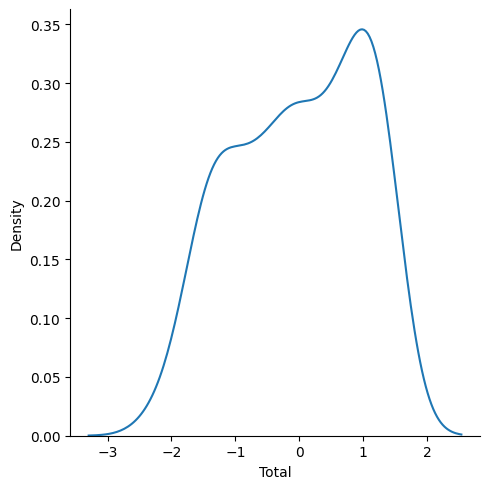

In [91]:
import seaborn as sns
# Visualizations of data
sns.displot(f_2013_subset, x="Total", kind="kde")


In [92]:
from sklearn.preprocessing import StandardScaler, normalize

# Normalizing
f_2013_subset = normalize(f_2013_subset)

# Converting the numpy array into a pandas DataFrame
f_2013_subset = pd.DataFrame(f_2013_subset)
f_2013_subset


,0,1,2,3,4,5,6,7
0,-0.342349,-0.252223,-0.362979,-0.370617,-0.220290,-0.366157,-0.490913,-0.355633
1,0.015247,-0.176087,-0.347337,0.749286,0.085709,0.314770,-0.421600,0.050165
2,-0.290553,-0.268000,-0.469074,-0.249161,-0.316379,-0.264405,-0.521620,-0.345761
3,0.389835,0.377954,-0.091556,0.324547,0.456364,0.301949,0.425654,0.332931
4,-0.342656,-0.517737,-0.476585,-0.392821,-0.239258,-0.220326,-0.099738,-0.342577
...,...,...,...,...,...,...,...,...
123,-0.299159,-0.202627,-0.530868,-0.243413,-0.435475,-0.363937,-0.297377,-0.343297
124,-0.435230,-0.425217,-0.349943,-0.401691,-0.420245,-0.197254,-0.104187,-0.345803
125,-0.333027,-0.355939,-0.353095,-0.360526,-0.365002,-0.356187,-0.337670,-0.365552
126,0.372021,0.464995,0.154092,-0.158690,-0.342214,-0.074381,-0.688161,-0.015661


In [93]:

f_2013_subset.rename(columns = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'Total'}, inplace = True)
f_2013_subset


,A,B,C,D,E,F,G,Total
0,-0.342349,-0.252223,-0.362979,-0.370617,-0.220290,-0.366157,-0.490913,-0.355633
1,0.015247,-0.176087,-0.347337,0.749286,0.085709,0.314770,-0.421600,0.050165
2,-0.290553,-0.268000,-0.469074,-0.249161,-0.316379,-0.264405,-0.521620,-0.345761
3,0.389835,0.377954,-0.091556,0.324547,0.456364,0.301949,0.425654,0.332931
4,-0.342656,-0.517737,-0.476585,-0.392821,-0.239258,-0.220326,-0.099738,-0.342577
...,...,...,...,...,...,...,...,...
123,-0.299159,-0.202627,-0.530868,-0.243413,-0.435475,-0.363937,-0.297377,-0.343297
124,-0.435230,-0.425217,-0.349943,-0.401691,-0.420245,-0.197254,-0.104187,-0.345803
125,-0.333027,-0.355939,-0.353095,-0.360526,-0.365002,-0.356187,-0.337670,-0.365552
126,0.372021,0.464995,0.154092,-0.158690,-0.342214,-0.074381,-0.688161,-0.015661


In [94]:
f_2013_subset.drop('Total', axis=1, inplace=True)

In [95]:
f_2013_subset2=f_2013_subset
f_2013_subset2

,A,B,C,D,E,F,G
0,-0.342349,-0.252223,-0.362979,-0.370617,-0.220290,-0.366157,-0.490913
1,0.015247,-0.176087,-0.347337,0.749286,0.085709,0.314770,-0.421600
2,-0.290553,-0.268000,-0.469074,-0.249161,-0.316379,-0.264405,-0.521620
3,0.389835,0.377954,-0.091556,0.324547,0.456364,0.301949,0.425654
4,-0.342656,-0.517737,-0.476585,-0.392821,-0.239258,-0.220326,-0.099738
...,...,...,...,...,...,...,...
123,-0.299159,-0.202627,-0.530868,-0.243413,-0.435475,-0.363937,-0.297377
124,-0.435230,-0.425217,-0.349943,-0.401691,-0.420245,-0.197254,-0.104187
125,-0.333027,-0.355939,-0.353095,-0.360526,-0.365002,-0.356187,-0.337670
126,0.372021,0.464995,0.154092,-0.158690,-0.342214,-0.074381,-0.688161


In [96]:
# Columns of interest
num_cols = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
data_subset = f_2013_subset2[num_cols]


In [97]:
#normalizza i dati
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)


In [98]:
# Create a DBSCAN object by specifying the parameters eps and min_samples
# Eps is the maximum distance between two points to consider them close
# min_samples is the minimum number of points needed to form a cluster
dbscan = DBSCAN(eps=0.9, min_samples=5)

clusters = dbscan.fit_predict(data_scaled)


In [99]:
# Labelling
f_2013_subset2["Cluster"] = clusters

# Count how many data are in each cluster
print(f_2013_subset2["Cluster"].value_counts())

for cluster_id in f_2013_subset2["Cluster"].unique():
    cluster_data = f_2013_subset2[f_2013_subset2["Cluster"] == cluster_id]
    print(f"Cluster {cluster_id}:\n{cluster_data}\n")


 1    49
 0    40
-1    39
Name: Cluster, dtype: int64
Cluster 0:
            A         B         C         D         E         F         G  \
0   -0.342349 -0.252223 -0.362979 -0.370617 -0.220290 -0.366157 -0.490913   
2   -0.290553 -0.268000 -0.469074 -0.249161 -0.316379 -0.264405 -0.521620   
4   -0.342656 -0.517737 -0.476585 -0.392821 -0.239258 -0.220326 -0.099738   
7   -0.427286 -0.376198 -0.323015 -0.450950 -0.402844 -0.221443 -0.180944   
8   -0.287407 -0.402615 -0.238839 -0.482555 -0.380034 -0.356639 -0.231056   
10  -0.406507 -0.312990 -0.326850 -0.425574 -0.392512 -0.314526 -0.257003   
20  -0.367521 -0.453824 -0.305415 -0.178669 -0.402807 -0.393080 -0.295463   
21  -0.378854 -0.389440 -0.334386 -0.278722 -0.345661 -0.337314 -0.386010   
23  -0.297052 -0.465444 -0.383050 -0.262524 -0.258358 -0.317710 -0.425960   
26  -0.509546 -0.448622 -0.301914 -0.248850 -0.151569 -0.388574 -0.292076   
27  -0.285949 -0.305621 -0.303180 -0.252711 -0.313403 -0.403824 -0.530141   
29  -0.255

In [100]:
import numpy as np
# Reordering clusters
# cluster 2--> 0: paesi meno liberi
# cluster 4--> 1
# cluster 0--> 2
# cluster 3--> 3
# clsuetr 1--> 4
cluster_array = clusters
remapped_clusters = np.where(cluster_array == -1, 0,
                             np.where(cluster_array == 0, 1,
                                      np.where(cluster_array == 1, 2,
                                               np.where(cluster_array == 2, 3,
                                                        np.where(cluster_array == 3, 4, 5)))))

print(remapped_clusters)

[1 0 1 2 1 2 2 1 1 0 1 2 0 0 0 0 0 2 2 0 1 1 2 1 2 0 1 1 2 1 2 2 2 2 2 0 0
 0 2 1 2 2 1 0 2 2 2 0 1 1 1 2 2 0 0 1 1 2 2 2 0 2 1 1 0 1 2 0 2 2 1 0 1 1
 2 1 0 0 2 0 1 1 0 2 2 0 0 1 0 0 2 0 0 0 2 2 2 1 1 2 2 0 0 2 2 2 2 2 1 2 1
 1 0 0 2 0 0 1 0 2 2 2 1 1 1 1 0 1]


In [101]:

f_2013_subset2['Cluster']=remapped_clusters

f_2013_subset2.reset_index(inplace=True)
f_2013_subset2['Country name']= f_2013_freedom['Country name']
f_2013_subset2['Political Rights']= f_2013_freedom['PR']
f_2013_subset2['Civil Rights']= f_2013_freedom['CL']
f_2013_subset2['Total Freedom']= f_2013_freedom['Total']

In [102]:
f_2013_subset2

,index,A,B,C,D,E,F,G,Cluster,Country name,Political Rights,Civil Rights,Total Freedom
0,0,-0.342349,-0.252223,-0.362979,-0.370617,-0.220290,-0.366157,-0.490913,1,Afghanistan,11,16,27
1,1,0.015247,-0.176087,-0.347337,0.749286,0.085709,0.314770,-0.421600,0,Albania,24,39,63
2,2,-0.290553,-0.268000,-0.469074,-0.249161,-0.316379,-0.264405,-0.521620,1,Angola,11,19,30
3,3,0.389835,0.377954,-0.091556,0.324547,0.456364,0.301949,0.425654,2,Argentina,31,49,80
4,4,-0.342656,-0.517737,-0.476585,-0.392821,-0.239258,-0.220326,-0.099738,1,Armenia,13,29,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,123,-0.299159,-0.202627,-0.530868,-0.243413,-0.435475,-0.363937,-0.297377,1,Venezuela,15,24,39
124,124,-0.435230,-0.425217,-0.349943,-0.401691,-0.420245,-0.197254,-0.104187,1,Vietnam,2,17,19
125,125,-0.333027,-0.355939,-0.353095,-0.360526,-0.365002,-0.356187,-0.337670,1,Yemen,9,16,25
126,126,0.372021,0.464995,0.154092,-0.158690,-0.342214,-0.074381,-0.688161,0,Zambia,28,34,62


In [103]:
import pandas as pd
data=f_2013_subset2
# New column "Civil_Rights_Mean" as mean of A, B, C
data["Civil_Rights_Mean"] = f_2013_subset2[["A", "B", "C"]].mean(axis=1)

# New column "Political_Rights_Mean" cas mean of D, E, F, G
data["Political_Rights_Mean"] = data[["D", "E", "F", "G"]].mean(axis=1)

print(data)


     index         A         B         C         D         E         F  \
0        0 -0.342349 -0.252223 -0.362979 -0.370617 -0.220290 -0.366157   
1        1  0.015247 -0.176087 -0.347337  0.749286  0.085709  0.314770   
2        2 -0.290553 -0.268000 -0.469074 -0.249161 -0.316379 -0.264405   
3        3  0.389835  0.377954 -0.091556  0.324547  0.456364  0.301949   
4        4 -0.342656 -0.517737 -0.476585 -0.392821 -0.239258 -0.220326   
..     ...       ...       ...       ...       ...       ...       ...   
123    123 -0.299159 -0.202627 -0.530868 -0.243413 -0.435475 -0.363937   
124    124 -0.435230 -0.425217 -0.349943 -0.401691 -0.420245 -0.197254   
125    125 -0.333027 -0.355939 -0.353095 -0.360526 -0.365002 -0.356187   
126    126  0.372021  0.464995  0.154092 -0.158690 -0.342214 -0.074381   
127    127 -0.331106 -0.298913 -0.275154 -0.358446 -0.362896 -0.410864   

            G  Cluster Country name  Political Rights  Civil Rights  \
0   -0.490913        1  Afghanistan     

In [104]:
# Scatterplot
fig = px.scatter(f_2013_subset2, x=f_2013_subset2['Political Rights'], y=f_2013_subset2['Civil Rights'], hover_data=f_2013_subset2[['Political Rights','Civil Rights','Country name', 'Total Freedom','Cluster']], color="Cluster")


fig.update_layout(
    title='Freedom 2013 Clustering',
    xaxis_title='Politics Rights',
    yaxis_title='Civil Rights'
)


fig.show()

In [105]:

data_subset = f_2013_subset[['A', 'B', 'C', 'D', 'E', 'F', 'G']]
silhouette = silhouette_score(data_subset, remapped_clusters)
print(f'Silhouette Score: {silhouette}')

calinski_harabasz= metrics.calinski_harabasz_score(data_subset, remapped_clusters)
print(f'Calinski Harabasz Score: {calinski_harabasz}')

davies_bouldin = davies_bouldin_score(data_subset, remapped_clusters)
print(f'Davies Bouldin Score: {davies_bouldin}')

Silhouette Score: 0.4282496865994778
Calinski Harabasz Score: 117.57834159721777
Davies Bouldin Score: 1.2682859479986126


**External Measures**

In [106]:
freedom_dict = {0:'NF',
                1:'PF',
                2:'F'
                }

f_2013_subset['Predicted_Label'] = f_2013_subset['Cluster'].map(freedom_dict)
f_2013_subset['Actual_Label'] = f_2013_freedom['Status']
f_2013_subset

,index,A,B,C,D,E,F,G,Cluster,Country name,Political Rights,Civil Rights,Total Freedom,Civil_Rights_Mean,Political_Rights_Mean,Predicted_Label,Actual_Label
0,0,-0.342349,-0.252223,-0.362979,-0.370617,-0.220290,-0.366157,-0.490913,1,Afghanistan,11,16,27,-0.319184,-0.361994,PF,NF
1,1,0.015247,-0.176087,-0.347337,0.749286,0.085709,0.314770,-0.421600,0,Albania,24,39,63,-0.169392,0.182041,NF,PF
2,2,-0.290553,-0.268000,-0.469074,-0.249161,-0.316379,-0.264405,-0.521620,1,Angola,11,19,30,-0.342542,-0.337891,PF,NF
3,3,0.389835,0.377954,-0.091556,0.324547,0.456364,0.301949,0.425654,2,Argentina,31,49,80,0.225411,0.377129,F,F
4,4,-0.342656,-0.517737,-0.476585,-0.392821,-0.239258,-0.220326,-0.099738,1,Armenia,13,29,42,-0.445659,-0.238036,PF,PF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,123,-0.299159,-0.202627,-0.530868,-0.243413,-0.435475,-0.363937,-0.297377,1,Venezuela,15,24,39,-0.344218,-0.335051,PF,PF
124,124,-0.435230,-0.425217,-0.349943,-0.401691,-0.420245,-0.197254,-0.104187,1,Vietnam,2,17,19,-0.403463,-0.280844,PF,NF
125,125,-0.333027,-0.355939,-0.353095,-0.360526,-0.365002,-0.356187,-0.337670,1,Yemen,9,16,25,-0.347354,-0.354846,PF,NF
126,126,0.372021,0.464995,0.154092,-0.158690,-0.342214,-0.074381,-0.688161,0,Zambia,28,34,62,0.330369,-0.315861,NF,PF


In [107]:
# external evaluation
# RAND index The score range is [-1, 1] for the adjusted Rand index.
labels_true = f_2013_subset['Actual_Label']
labels_pred = f_2013_subset['Predicted_Label']

adjusted_rand = metrics.adjusted_rand_score(labels_true, labels_pred)
print(f'Adjusted Rand Score: {adjusted_rand}')


homogeneity = metrics.homogeneity_score(labels_true, labels_pred)
print(f'Homogeneity: {homogeneity}')

completeness = metrics.completeness_score(labels_true, labels_pred)
print(f'Completeness: {completeness}')

f_m = metrics.fowlkes_mallows_score(labels_true, labels_pred)
print(f'Fowlkes Mallows Score: {f_m}') #The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.

Adjusted Rand Score: 0.6048788317126874
Homogeneity: 0.656682538195229
Completeness: 0.6327873195134861
Fowlkes Mallows Score: 0.7414201075611134


# DB Scan 2022 - Freedom

In [108]:
freedom_cleaned=pd.read_csv('/content/drive/MyDrive/DS LAB - Colombaro, Ferretti, Fracchia, Salvatori/PROCESSED DATASETS/Happiness + Freedom/freedom_cleaned.csv')
freedom_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country name                               1338 non-null   object 
 1   Region                                     1338 non-null   object 
 2   C/T                                        1338 non-null   object 
 3   Edition                                    1338 non-null   int64  
 4   Status                                     1338 non-null   object 
 5   PR rating                                  1338 non-null   int64  
 6   CL rating                                  1338 non-null   int64  
 7   A1                                         1338 non-null   int64  
 8   A2                                         1338 non-null   int64  
 9   A3                                         1338 non-null   int64  
 10  A                       

In [109]:
f_2022 = freedom_cleaned[freedom_cleaned['Edition']==2022]
f_2022.info()
f_2022.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 8 to 1337
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country name                               113 non-null    object 
 1   Region                                     113 non-null    object 
 2   C/T                                        113 non-null    object 
 3   Edition                                    113 non-null    int64  
 4   Status                                     113 non-null    object 
 5   PR rating                                  113 non-null    int64  
 6   CL rating                                  113 non-null    int64  
 7   A1                                         113 non-null    int64  
 8   A2                                         113 non-null    int64  
 9   A3                                         113 non-null    int64  
 10  A                        

Country name       0
Region             0
C/T                0
Edition            0
Status             0
                  ..
iso_3166-2         1
region             1
sub-region         1
region-code        1
sub-region-code    1
Length: 76, dtype: int64

In [110]:
#elimino tutte le righe con un valore mancante
f_2022.dropna(axis=0, how= 'any', inplace=True)

<ipython-input-110-5396be9c6de3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
# Columns of interest
f_2022_freedom = f_2022[['Country name', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'PR', 'CL', 'Total', 'Status']]
f_2022_freedom.reset_index(inplace=True)

f_2022_subset=f_2022[['Country name', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Total']]
f_2022_subset.set_index('Country name', inplace=True)

In [112]:
from sklearn.preprocessing import StandardScaler


num_col = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Total']
scaler = StandardScaler()
for i in num_col:
  f_2022_subset[[i]] = scaler.fit_transform(f_2022_subset[[i]])


<ipython-input-112-6e041885a0f9>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-6e041885a0f9>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-6e041885a0f9>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-6e0

In [113]:

f_2022_subset
f_2022_subset2=f_2022_subset
f_2022_subset2

,A,B,C,D,E,F,G,Total
Country name,,,,,,,,
Afghanistan,-2.300966,-2.556681,-1.835347,-2.256175,-1.673713,-2.138428,-2.354331,-2.292145
Albania,0.054415,0.140184,-0.064296,0.323527,-0.139729,-0.027862,-0.456370,-0.020518
Argentina,0.577833,1.039139,0.230880,0.896794,0.780661,0.206645,0.628179,0.656984
Armenia,-0.469003,-0.309294,-0.359471,-0.823007,-0.139729,-0.731384,-0.456370,-0.498756
Australia,0.839542,0.814400,1.411581,0.896794,1.087458,1.379182,0.899317,1.095368
...,...,...,...,...,...,...,...,...
Ukraine,0.054415,0.140184,-0.654646,-0.249740,-0.139729,-0.731384,-0.185232,-0.259637
United Kingdom,0.839542,1.039139,1.116406,0.610161,1.087458,0.910167,1.170454,1.015662
United States,0.316124,0.364922,0.526055,0.610161,0.780661,0.441152,1.170454,0.617131


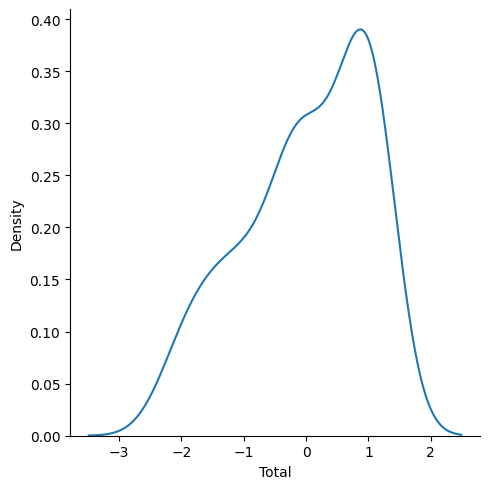

In [114]:
import seaborn as sns
# Visualization of data
sns.displot(f_2022_subset, x="Total", kind="kde")


In [115]:
from sklearn.preprocessing import StandardScaler, normalize

f_2022_subset = normalize(f_2022_subset)

f_2022_subset = pd.DataFrame(f_2022_subset)
f_2022_subset


,0,1,2,3,4,5,6,7
0,-0.371023,-0.412256,-0.295943,-0.363800,-0.269880,-0.344814,-0.379628,-0.369600
1,0.090640,0.233506,-0.107098,0.538904,-0.232749,-0.046411,-0.760182,-0.034178
2,0.298407,0.536636,0.119232,0.463126,0.403152,0.106717,0.324407,0.339283
3,-0.321080,-0.211743,-0.246094,-0.563431,-0.095659,-0.500706,-0.312431,-0.341448
4,0.275918,0.267655,0.463920,0.294734,0.357396,0.453272,0.295563,0.359996
...,...,...,...,...,...,...,...,...
96,0.050313,0.129616,-0.605295,-0.230913,-0.129196,-0.676248,-0.171268,-0.240064
97,0.300300,0.371695,0.399333,0.218252,0.388979,0.325563,0.418666,0.363298
98,0.170517,0.196839,0.283754,0.329120,0.421088,0.237957,0.631343,0.332880
99,0.260065,0.321894,0.437265,0.366590,0.336861,0.354585,0.362571,0.364002


In [116]:

f_2022_subset.rename(columns = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'Total'}, inplace = True)
f_2022_subset


,A,B,C,D,E,F,G,Total
0,-0.371023,-0.412256,-0.295943,-0.363800,-0.269880,-0.344814,-0.379628,-0.369600
1,0.090640,0.233506,-0.107098,0.538904,-0.232749,-0.046411,-0.760182,-0.034178
2,0.298407,0.536636,0.119232,0.463126,0.403152,0.106717,0.324407,0.339283
3,-0.321080,-0.211743,-0.246094,-0.563431,-0.095659,-0.500706,-0.312431,-0.341448
4,0.275918,0.267655,0.463920,0.294734,0.357396,0.453272,0.295563,0.359996
...,...,...,...,...,...,...,...,...
96,0.050313,0.129616,-0.605295,-0.230913,-0.129196,-0.676248,-0.171268,-0.240064
97,0.300300,0.371695,0.399333,0.218252,0.388979,0.325563,0.418666,0.363298
98,0.170517,0.196839,0.283754,0.329120,0.421088,0.237957,0.631343,0.332880
99,0.260065,0.321894,0.437265,0.366590,0.336861,0.354585,0.362571,0.364002


In [117]:
f_2022_subset.drop('Total', axis=1, inplace=True)

In [118]:
f_2022_subset2=f_2022_subset
f_2022_subset2

,A,B,C,D,E,F,G
0,-0.371023,-0.412256,-0.295943,-0.363800,-0.269880,-0.344814,-0.379628
1,0.090640,0.233506,-0.107098,0.538904,-0.232749,-0.046411,-0.760182
2,0.298407,0.536636,0.119232,0.463126,0.403152,0.106717,0.324407
3,-0.321080,-0.211743,-0.246094,-0.563431,-0.095659,-0.500706,-0.312431
4,0.275918,0.267655,0.463920,0.294734,0.357396,0.453272,0.295563
...,...,...,...,...,...,...,...
96,0.050313,0.129616,-0.605295,-0.230913,-0.129196,-0.676248,-0.171268
97,0.300300,0.371695,0.399333,0.218252,0.388979,0.325563,0.418666
98,0.170517,0.196839,0.283754,0.329120,0.421088,0.237957,0.631343
99,0.260065,0.321894,0.437265,0.366590,0.336861,0.354585,0.362571


In [119]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


In [120]:
# SColumns of interest
num_cols = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
data_subset = f_2022_subset2[num_cols]


In [121]:

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)


In [122]:
# Create a DBSCAN object by specifying the parameters eps and min_samples
# Eps is the maximum distance between two points to consider them close
# min_samples is the minimum number of points needed to form a cluster
dbscan = DBSCAN(eps=0.7, min_samples=5)


clusters = dbscan.fit_predict(data_scaled)


In [123]:
# Labelling
f_2022_subset2["Cluster"] = clusters


print(f_2022_subset2["Cluster"].value_counts())

for cluster_id in f_2022_subset2["Cluster"].unique():
    cluster_data = f_2022_subset2[f_2022_subset2["Cluster"] == cluster_id]
    print(f"Cluster {cluster_id}:\n{cluster_data}\n")


-1    45
 1    35
 0    21
Name: Cluster, dtype: int64
Cluster 0:
            A         B         C         D         E         F         G  \
0   -0.371023 -0.412256 -0.295943 -0.363800 -0.269880 -0.344814 -0.379628   
6   -0.390035 -0.305872 -0.295395 -0.523385 -0.329698 -0.373325 -0.141931   
13  -0.430865 -0.445221 -0.325416 -0.295012 -0.353631 -0.303175 -0.268286   
15  -0.404758 -0.410207 -0.374775 -0.296037 -0.240451 -0.334914 -0.366450   
18  -0.354563 -0.351379 -0.339343 -0.396442 -0.269140 -0.261302 -0.453656   
19  -0.389829 -0.402818 -0.350849 -0.266915 -0.319951 -0.363958 -0.346397   
21  -0.352995 -0.257982 -0.458843 -0.259113 -0.215709 -0.353320 -0.482429   
28  -0.324734 -0.384958 -0.281369 -0.464537 -0.417861 -0.304980 -0.231972   
31  -0.254798 -0.336796 -0.192973 -0.458381 -0.340044 -0.386815 -0.423237   
39  -0.535693 -0.258358 -0.404588 -0.140900 -0.359075 -0.315333 -0.333559   
45  -0.299318 -0.354828 -0.358755 -0.476445 -0.385155 -0.241621 -0.305129   
52  -0.406

In [124]:
import numpy as np
# Ordering data

cluster_array = clusters
remapped_clusters = np.where(cluster_array == -1, 0,
                             np.where(cluster_array == 0, 1,
                                      np.where(cluster_array == 1, 2,
                                               np.where(cluster_array == 2, 3,
                                                        np.where(cluster_array == 3, 4, 5)))))

print(remapped_clusters)

[1 0 0 0 2 2 1 2 0 0 0 0 0 1 2 1 2 0 1 1 2 1 2 2 2 2 0 0 1 0 2 1 2 2 0 2 0
 2 0 1 0 0 2 0 0 1 2 0 2 0 2 0 1 1 2 0 0 2 2 0 0 1 2 0 2 0 0 0 1 1 0 0 2 2
 1 0 0 2 0 0 0 0 2 0 0 0 2 2 2 2 2 1 1 0 1 0 0 2 0 2 1]


In [125]:
f_2022_subset2['Cluster']=remapped_clusters

f_2022_subset2.reset_index(inplace=True)
f_2022_subset2['Country name']= f_2022_freedom['Country name']
f_2022_subset2['Political Rights']= f_2022_freedom['PR']
f_2022_subset2['Civil Rights']= f_2022_freedom['CL']
f_2022_subset2['Total Freedom']= f_2022_freedom['Total']

In [126]:
f_2013_subset2

,index,A,B,C,D,E,F,G,Cluster,Country name,Political Rights,Civil Rights,Total Freedom,Civil_Rights_Mean,Political_Rights_Mean,Predicted_Label,Actual_Label
0,0,-0.342349,-0.252223,-0.362979,-0.370617,-0.220290,-0.366157,-0.490913,1,Afghanistan,11,16,27,-0.319184,-0.361994,PF,NF
1,1,0.015247,-0.176087,-0.347337,0.749286,0.085709,0.314770,-0.421600,0,Albania,24,39,63,-0.169392,0.182041,NF,PF
2,2,-0.290553,-0.268000,-0.469074,-0.249161,-0.316379,-0.264405,-0.521620,1,Angola,11,19,30,-0.342542,-0.337891,PF,NF
3,3,0.389835,0.377954,-0.091556,0.324547,0.456364,0.301949,0.425654,2,Argentina,31,49,80,0.225411,0.377129,F,F
4,4,-0.342656,-0.517737,-0.476585,-0.392821,-0.239258,-0.220326,-0.099738,1,Armenia,13,29,42,-0.445659,-0.238036,PF,PF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,123,-0.299159,-0.202627,-0.530868,-0.243413,-0.435475,-0.363937,-0.297377,1,Venezuela,15,24,39,-0.344218,-0.335051,PF,PF
124,124,-0.435230,-0.425217,-0.349943,-0.401691,-0.420245,-0.197254,-0.104187,1,Vietnam,2,17,19,-0.403463,-0.280844,PF,NF
125,125,-0.333027,-0.355939,-0.353095,-0.360526,-0.365002,-0.356187,-0.337670,1,Yemen,9,16,25,-0.347354,-0.354846,PF,NF
126,126,0.372021,0.464995,0.154092,-0.158690,-0.342214,-0.074381,-0.688161,0,Zambia,28,34,62,0.330369,-0.315861,NF,PF


In [127]:
import pandas as pd
data=f_2022_subset2

data["Civil_Rights_Mean"] = f_2022_subset2[["A", "B", "C"]].mean(axis=1)


data["Political_Rights_Mean"] = data[["D", "E", "F", "G"]].mean(axis=1)

print(data)


     index         A         B         C         D         E         F  \
0        0 -0.371023 -0.412256 -0.295943 -0.363800 -0.269880 -0.344814   
1        1  0.090640  0.233506 -0.107098  0.538904 -0.232749 -0.046411   
2        2  0.298407  0.536636  0.119232  0.463126  0.403152  0.106717   
3        3 -0.321080 -0.211743 -0.246094 -0.563431 -0.095659 -0.500706   
4        4  0.275918  0.267655  0.463920  0.294734  0.357396  0.453272   
..     ...       ...       ...       ...       ...       ...       ...   
96      96  0.050313  0.129616 -0.605295 -0.230913 -0.129196 -0.676248   
97      97  0.300300  0.371695  0.399333  0.218252  0.388979  0.325563   
98      98  0.170517  0.196839  0.283754  0.329120  0.421088  0.237957   
99      99  0.260065  0.321894  0.437265  0.366590  0.336861  0.354585   
100    100 -0.354409 -0.335038 -0.291085 -0.326455 -0.391321 -0.390316   

            G  Cluster    Country name  Political Rights  Civil Rights  \
0   -0.379628        1     Afghanista

In [128]:
import plotly.express as px
fig = px.scatter(f_2022_subset2, x=f_2022_subset2['Political Rights'], y=f_2022_subset2['Civil Rights'], hover_data=f_2022_subset2[['Political Rights','Civil Rights','Country name', 'Total Freedom','Cluster']], color="Cluster")


fig.update_layout(
    title='Freedom 2020 Clustering',
    xaxis_title='Politics Rights',
    yaxis_title='Civil Rights'
)


fig.show()

**External Measures**

In [129]:
freedom_dict = {0:'NF',
                1:'PF',
                2:'F'
                }

f_2022_subset['Predicted_Label'] = f_2022_subset['Cluster'].map(freedom_dict)
f_2022_subset['Actual_Label'] = f_2022_freedom['Status']
f_2022_subset

,index,A,B,C,D,E,F,G,Cluster,Country name,Political Rights,Civil Rights,Total Freedom,Civil_Rights_Mean,Political_Rights_Mean,Predicted_Label,Actual_Label
0,0,-0.371023,-0.412256,-0.295943,-0.363800,-0.269880,-0.344814,-0.379628,1,Afghanistan,1,9,10,-0.359741,-0.339531,PF,NF
1,1,0.090640,0.233506,-0.107098,0.538904,-0.232749,-0.046411,-0.760182,0,Albania,28,39,67,0.072349,-0.125110,NF,PF
2,2,0.298407,0.536636,0.119232,0.463126,0.403152,0.106717,0.324407,0,Argentina,35,49,84,0.318092,0.324351,NF,F
3,3,-0.321080,-0.211743,-0.246094,-0.563431,-0.095659,-0.500706,-0.312431,0,Armenia,23,32,55,-0.259639,-0.368056,NF,PF
4,4,0.275918,0.267655,0.463920,0.294734,0.357396,0.453272,0.295563,2,Australia,39,56,95,0.335831,0.350241,F,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,0.050313,0.129616,-0.605295,-0.230913,-0.129196,-0.676248,-0.171268,0,Ukraine,26,35,61,-0.141789,-0.301906,NF,PF
97,97,0.300300,0.371695,0.399333,0.218252,0.388979,0.325563,0.418666,2,United Kingdom,39,54,93,0.357109,0.337865,F,F
98,98,0.170517,0.196839,0.283754,0.329120,0.421088,0.237957,0.631343,0,United States,32,51,83,0.217037,0.404877,NF,F
99,99,0.260065,0.321894,0.437265,0.366590,0.336861,0.354585,0.362571,2,Uruguay,40,57,97,0.339741,0.355152,F,F


In [130]:
# external evaluation
# RAND index The score range is [-1, 1] for the adjusted Rand index.
labels_true = f_2022_subset['Actual_Label']
labels_pred = f_2022_subset['Predicted_Label']

adjusted_rand = metrics.adjusted_rand_score(labels_true, labels_pred)
print(f'Adjusted Rand Score: {adjusted_rand}')


homogeneity = metrics.homogeneity_score(labels_true, labels_pred)
print(f'Homogeneity: {homogeneity}')

completeness = metrics.completeness_score(labels_true, labels_pred)
print(f'Completeness: {completeness}')

f_m = metrics.fowlkes_mallows_score(labels_true, labels_pred)
print(f'Fowlkes Mallows Score: {f_m}') #The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.

Adjusted Rand Score: 0.4286351013131279
Homogeneity: 0.530057948457099
Completeness: 0.49779321243477226
Fowlkes Mallows Score: 0.6425672224676711


# DB Scan - Happiness 2013

In [131]:
data_happiness=pd.read_csv('/content/drive/MyDrive/DS LAB - Colombaro, Ferretti, Fracchia, Salvatori/PROCESSED DATASETS/Happiness + Freedom/freedom_cleaned.csv')
data_happiness

,Country name,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,Perceptions of corruption % change,Positive affect,Negative affect,Happiness scaled,country-code,iso_3166-2,region,sub-region,region-code,sub-region-code
0,Afghanistan,Asia,c,2013,NF,6,6,1,1,1,...,0.000000,0.547417,0.273328,35.721004,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Afghanistan,Asia,c,2014,NF,6,6,1,1,1,...,0.003405,0.491641,0.374861,31.308956,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
2,Afghanistan,Asia,c,2015,NF,6,6,1,1,1,...,0.000116,0.491410,0.339276,39.828546,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
3,Afghanistan,Asia,c,2016,NF,6,6,1,0,1,...,0.009848,0.501409,0.348332,42.201686,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
4,Afghanistan,Asia,c,2017,NF,6,6,1,0,1,...,0.041269,0.435270,0.371326,26.617181,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Zimbabwe,Africa,c,2018,NF,6,5,0,1,1,...,0.015327,0.657524,0.211726,36.164799,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,2.0,202.0
1334,Zimbabwe,Africa,c,2019,PF,5,5,1,1,1,...,0.000258,0.658434,0.235354,26.935232,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,2.0,202.0
1335,Zimbabwe,Africa,c,2020,PF,5,5,1,1,1,...,0.002572,0.660658,0.345736,31.598022,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,2.0,202.0
1336,Zimbabwe,Africa,c,2021,NF,6,5,1,1,1,...,0.001604,0.609917,0.241682,31.545782,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,2.0,202.0


In [132]:
happiness_2013=data_happiness[data_happiness['Edition']==2013]
happiness_2013

,Country name,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,Perceptions of corruption % change,Positive affect,Negative affect,Happiness scaled,country-code,iso_3166-2,region,sub-region,region-code,sub-region-code
0,Afghanistan,Asia,c,2013,NF,6,6,1,1,1,...,0.0,0.547417,0.273328,35.721004,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
9,Albania,Europe,c,2013,PF,3,3,3,3,2,...,0.0,0.540751,0.338379,45.506477,8.0,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
26,Angola,Africa,c,2013,NF,6,5,0,2,2,...,0.0,0.650047,0.370875,39.371068,24.0,ISO 3166-2:AO,Africa,Sub-Saharan Africa,2.0,202.0
28,Argentina,Americas,c,2013,F,2,2,4,4,3,...,0.0,0.766157,0.254205,65.822601,32.0,ISO 3166-2:AR,Americas,Latin America and the Caribbean,19.0,419.0
38,Armenia,Eurasia,c,2013,PF,5,4,1,2,2,...,0.0,0.502904,0.449950,42.771912,51.0,ISO 3166-2:AM,Asia,Western Asia,142.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,Venezuela,Americas,c,2013,PF,5,5,2,2,1,...,0.0,0.812144,0.237609,65.527964,862.0,ISO 3166-2:VE,Americas,Latin America and the Caribbean,19.0,419.0
1302,Vietnam,Asia,c,2013,NF,7,5,0,0,0,...,0.0,0.688878,0.165225,50.226989,704.0,ISO 3166-2:VN,Asia,South-eastern Asia,142.0,35.0
1312,Yemen,Middle East,c,2013,NF,6,6,1,0,2,...,0.0,0.478329,0.265685,42.176785,887.0,ISO 3166-2:YE,Asia,Western Asia,142.0,145.0
1319,Zambia,Africa,c,2013,PF,3,4,3,3,3,...,0.0,0.726740,0.307960,52.439957,894.0,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,2.0,202.0


In [133]:
happiness_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 1328
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country name                               135 non-null    object 
 1   Region                                     135 non-null    object 
 2   C/T                                        135 non-null    object 
 3   Edition                                    135 non-null    int64  
 4   Status                                     135 non-null    object 
 5   PR rating                                  135 non-null    int64  
 6   CL rating                                  135 non-null    int64  
 7   A1                                         135 non-null    int64  
 8   A2                                         135 non-null    int64  
 9   A3                                         135 non-null    int64  
 10  A                        

In [134]:
dh_2013=happiness_2013[['Country name', 'Happiness', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
dh_2013.set_index('Country name', inplace=True)
dh_2013.dropna(axis=0, how= 'any', inplace=True)
dh_2013

<ipython-input-134-49f6060e1893>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Happiness,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,,
Afghanistan,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204
Albania,4.550648,9.338146,0.759477,68.440002,0.631830,-0.128825,0.862905
Angola,3.937107,8.999667,0.721591,52.459999,0.409555,-0.105992,0.816375
Argentina,6.582260,10.103327,0.909874,66.660004,0.737250,-0.133839,0.822900
Armenia,4.277191,9.275876,0.723260,65.519997,0.504082,-0.198420,0.899797
...,...,...,...,...,...,...,...
Venezuela,6.552796,9.801931,0.896301,65.180000,0.641965,-0.227712,0.837300
Vietnam,5.022699,8.889822,0.759477,64.739998,0.919607,-0.045563,0.771246
Yemen,4.217679,8.166425,0.693905,58.480000,0.542547,-0.175701,0.885197


In [135]:
dh_2013.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Happiness                         128 non-null    float64
 1   Log GDP per capita                128 non-null    float64
 2   Social support                    128 non-null    float64
 3   Healthy life expectancy at birth  128 non-null    float64
 4   Freedom to make life choices      128 non-null    float64
 5   Generosity                        128 non-null    float64
 6   Perceptions of corruption         128 non-null    float64
dtypes: float64(7)
memory usage: 8.0+ KB


In [136]:
# Import delle librerie necessarie
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

dh_2013 = happiness_2013[['Country name', 'Happiness', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
dh_2013.set_index('Country name', inplace=True)
dh_2013.dropna(axis=0, how='any', inplace=True)



scaler = StandardScaler()
dh_2013_std = scaler.fit_transform(dh_2013)


scaler = MinMaxScaler()
dh_2013_std_norm = scaler.fit_transform(dh_2013_std)



dh_2013_std_norm = pd.DataFrame(dh_2013_std_norm, index=dh_2013.index, columns=dh_2013.columns)

dh_2013_std_norm.reset_index(inplace=True)
dh_2013_std_norm


<ipython-input-136-492ee45913a3>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country name,Happiness,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,0.180290,0.173368,0.000000,0.273469,0.335505,0.360241,0.825291
1,Albania,0.379740,0.519844,0.570572,0.832653,0.431848,0.166230,0.871697
2,Angola,0.254687,0.449103,0.492230,0.289116,0.034359,0.189364,0.817309
3,Argentina,0.793827,0.679763,0.881573,0.772109,0.620368,0.161151,0.824935
4,Armenia,0.324003,0.506830,0.495682,0.733333,0.203399,0.095719,0.914820
...,...,...,...,...,...,...,...,...
123,Venezuela,0.787822,0.616773,0.853505,0.721769,0.449972,0.066043,0.841767
124,Vietnam,0.475954,0.426146,0.570573,0.706803,0.946472,0.250588,0.764556
125,Yemen,0.311873,0.274959,0.434980,0.493878,0.272186,0.118737,0.897754
126,Zambia,0.521059,0.263374,0.574367,0.252381,0.678777,0.190374,0.718995


In [137]:
# Selecting columns
num_cols = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
data_subset = dh_2013_std_norm[num_cols]


In [138]:

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)


In [139]:
# Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)


clusters = dbscan.fit_predict(data_scaled)


In [140]:
# Labelling
dh_2013_std_norm["Cluster"] = clusters

print(dh_2013_std_norm["Cluster"].value_counts())


for cluster_id in dh_2013_std_norm["Cluster"].unique():
    cluster_data = dh_2013_std_norm[dh_2013_std_norm["Cluster"] == cluster_id]
    print(f"Cluster {cluster_id}:\n{cluster_data}\n")


 0    115
-1     13
Name: Cluster, dtype: int64
Cluster 0:
    Country name  Happiness  Log GDP per capita  Social support  \
0    Afghanistan   0.180290            0.173368        0.000000   
1        Albania   0.379740            0.519844        0.570572   
3      Argentina   0.793827            0.679763        0.881573   
4        Armenia   0.324003            0.506830        0.495682   
5      Australia   0.953197            0.815428        0.919478   
..           ...        ...                 ...             ...   
123    Venezuela   0.787822            0.616773        0.853505   
124      Vietnam   0.475954            0.426146        0.570573   
125        Yemen   0.311873            0.274959        0.434980   
126       Zambia   0.521059            0.263374        0.574367   
127     Zimbabwe   0.408181            0.189012        0.652867   

     Healthy life expectancy at birth  Freedom to make life choices  \
0                            0.273469                      0.3355

In [141]:
import numpy as np

cluster_array = clusters
remapped_clusters = np.where(cluster_array == -1, 0,
                             np.where(cluster_array == 0, 1,
                                      np.where(cluster_array == 1, 2,2)))

print(remapped_clusters)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1]


In [142]:
dh_2013_std_norm['Cluster'] = remapped_clusters

In [143]:
import plotly.graph_objects as go

fig = px.scatter(dh_2013_std_norm, x='Happiness', y='Log GDP per capita', color='Cluster', hover_data=['Country name'])

fig.update_layout(
    title='Happiness 2013 Clustering',
    xaxis_title='Social support',
    yaxis_title='Life Expectancy'
)

fig.show()

In [144]:
# silhouette coefficient
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

data_subset = dh_2013_std_norm[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
silhouette = silhouette_score(data_subset, remapped_clusters)
print(f'Silhouette Score: {silhouette}')

calinski_harabasz= metrics.calinski_harabasz_score(data_subset, remapped_clusters)
print(f'Calinski Harabasz Score: {calinski_harabasz}') #The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared)


davies_bouldin = davies_bouldin_score(data_subset, remapped_clusters)
print(f'Davies Bouldin Score: {davies_bouldin}')

Silhouette Score: 0.16343277718722216
Calinski Harabasz Score: 4.6310212795379435
Davies Bouldin Score: 3.2690066579620787


In [145]:
dh_2013_std_norm

,Country name,Happiness,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
0,Afghanistan,0.180290,0.173368,0.000000,0.273469,0.335505,0.360241,0.825291,1
1,Albania,0.379740,0.519844,0.570572,0.832653,0.431848,0.166230,0.871697,1
2,Angola,0.254687,0.449103,0.492230,0.289116,0.034359,0.189364,0.817309,0
3,Argentina,0.793827,0.679763,0.881573,0.772109,0.620368,0.161151,0.824935,1
4,Armenia,0.324003,0.506830,0.495682,0.733333,0.203399,0.095719,0.914820,1
...,...,...,...,...,...,...,...,...,...
123,Venezuela,0.787822,0.616773,0.853505,0.721769,0.449972,0.066043,0.841767,1
124,Vietnam,0.475954,0.426146,0.570573,0.706803,0.946472,0.250588,0.764556,1
125,Yemen,0.311873,0.274959,0.434980,0.493878,0.272186,0.118737,0.897754,1
126,Zambia,0.521059,0.263374,0.574367,0.252381,0.678777,0.190374,0.718995,1


In [146]:
fig = go.Figure(
    go.Choropleth(
        locations=dh_2013_std_norm["Country name"],
        z=dh_2013_std_norm['Cluster'],
        locationmode='country names',
        colorscale= 'Jet',
        autocolorscale=False,
        marker_line_color="white",
        marker_line_width=0.5,
        colorbar=dict(
            tickvals=[0, 1],
            ticktext=["0", "1"]
        )
        )
    )
fig.show()

# DB Scan - Happiness 2022

In [147]:
data_happiness=pd.read_csv('/content/drive/MyDrive/DS LAB - Colombaro, Ferretti, Fracchia, Salvatori/PROCESSED DATASETS/Happiness + Freedom/freedom_cleaned.csv')
data_happiness

,Country name,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,Perceptions of corruption % change,Positive affect,Negative affect,Happiness scaled,country-code,iso_3166-2,region,sub-region,region-code,sub-region-code
0,Afghanistan,Asia,c,2013,NF,6,6,1,1,1,...,0.000000,0.547417,0.273328,35.721004,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Afghanistan,Asia,c,2014,NF,6,6,1,1,1,...,0.003405,0.491641,0.374861,31.308956,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
2,Afghanistan,Asia,c,2015,NF,6,6,1,1,1,...,0.000116,0.491410,0.339276,39.828546,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
3,Afghanistan,Asia,c,2016,NF,6,6,1,0,1,...,0.009848,0.501409,0.348332,42.201686,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
4,Afghanistan,Asia,c,2017,NF,6,6,1,0,1,...,0.041269,0.435270,0.371326,26.617181,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Zimbabwe,Africa,c,2018,NF,6,5,0,1,1,...,0.015327,0.657524,0.211726,36.164799,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,2.0,202.0
1334,Zimbabwe,Africa,c,2019,PF,5,5,1,1,1,...,0.000258,0.658434,0.235354,26.935232,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,2.0,202.0
1335,Zimbabwe,Africa,c,2020,PF,5,5,1,1,1,...,0.002572,0.660658,0.345736,31.598022,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,2.0,202.0
1336,Zimbabwe,Africa,c,2021,NF,6,5,1,1,1,...,0.001604,0.609917,0.241682,31.545782,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,2.0,202.0


In [148]:
happiness_2022=data_happiness[data_happiness['Edition']==2022]
happiness_2022

,Country name,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,Perceptions of corruption % change,Positive affect,Negative affect,Happiness scaled,country-code,iso_3166-2,region,sub-region,region-code,sub-region-code
8,Afghanistan,Asia,c,2022,NF,7,6,0,0,0,...,5.071261e-02,0.205868,0.575512,12.812711,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
18,Albania,Europe,c,2022,PF,3,3,3,3,3,...,3.191432e-03,0.547126,0.254826,52.122130,8.0,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
37,Argentina,Americas,c,2022,F,2,2,4,4,3,...,5.805304e-05,0.724068,0.284279,62.609935,32.0,ISO 3166-2:AR,Americas,Latin America and the Caribbean,19.0,419.0
46,Armenia,Eurasia,c,2022,PF,4,4,2,2,3,...,7.317947e-07,0.530931,0.549468,53.819427,51.0,ISO 3166-2:AM,Asia,Western Asia,142.0,145.0
56,Australia,Asia,c,2022,F,1,1,4,4,4,...,4.071355e-02,0.710772,0.243920,70.346961,36.0,ISO 3166-2:AU,Oceania,Australia and New Zealand,9.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,Uruguay,Americas,c,2022,F,1,1,4,4,4,...,1.799906e-03,0.774694,0.267485,66.708527,858.0,ISO 3166-2:UY,Americas,Latin America and the Caribbean,19.0,419.0
1291,Uzbekistan,Eurasia,c,2022,NF,7,6,0,0,1,...,4.775505e-03,0.741082,0.224580,60.162387,860.0,ISO 3166-2:UZ,Asia,Central Asia,142.0,143.0
1301,Venezuela,Americas,c,2022,NF,7,6,0,0,0,...,9.868440e-04,0.754337,0.292252,59.489923,862.0,ISO 3166-2:VE,Americas,Latin America and the Caribbean,19.0,419.0
1311,Vietnam,Asia,c,2022,NF,7,6,0,0,0,...,1.399085e-02,0.774236,0.108473,62.665086,704.0,ISO 3166-2:VN,Asia,South-eastern Asia,142.0,35.0


In [149]:
happiness_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 8 to 1337
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country name                               113 non-null    object 
 1   Region                                     113 non-null    object 
 2   C/T                                        113 non-null    object 
 3   Edition                                    113 non-null    int64  
 4   Status                                     113 non-null    object 
 5   PR rating                                  113 non-null    int64  
 6   CL rating                                  113 non-null    int64  
 7   A1                                         113 non-null    int64  
 8   A2                                         113 non-null    int64  
 9   A3                                         113 non-null    int64  
 10  A                        

In [150]:
dh_2022=happiness_2022[['Country name', 'Happiness', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
dh_2022.set_index('Country name', inplace=True)
dh_2022.dropna(axis=0, how= 'any', inplace=True)
dh_2022

<ipython-input-150-02bd2c6e0757>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Happiness,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,,
Afghanistan,1.281271,7.612240,0.228217,54.875000,0.368377,-0.012944,0.733198
Albania,5.212213,9.626483,0.724090,69.175003,0.802250,-0.065987,0.845502
Argentina,6.260993,10.011405,0.893330,67.250000,0.825189,-0.127506,0.810037
Armenia,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730
Australia,7.034696,10.853529,0.941673,71.125000,0.853777,0.153465,0.545217
...,...,...,...,...,...,...,...
Uruguay,6.670853,10.084121,0.904825,67.500000,0.877969,-0.051668,0.631337
Uzbekistan,6.016239,8.989866,0.878923,65.599998,0.959019,0.308951,0.615844
Venezuela,5.948992,7.529616,0.899366,63.875000,0.770417,-0.043256,0.798016


In [151]:
dh_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Happiness                         109 non-null    float64
 1   Log GDP per capita                109 non-null    float64
 2   Social support                    109 non-null    float64
 3   Healthy life expectancy at birth  109 non-null    float64
 4   Freedom to make life choices      109 non-null    float64
 5   Generosity                        109 non-null    float64
 6   Perceptions of corruption         109 non-null    float64
dtypes: float64(7)
memory usage: 6.8+ KB


In [152]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

dh_2022 = happiness_2022[['Country name', 'Happiness', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
dh_2022.set_index('Country name', inplace=True)
dh_2022.dropna(axis=0, how='any', inplace=True)


# Standardization
scaler = StandardScaler()
dh_2022_std = scaler.fit_transform(dh_2022)

# Normalization
scaler = MinMaxScaler()
dh_2022_std_norm = scaler.fit_transform(dh_2022_std)


dh_2022_std_norm = pd.DataFrame(dh_2022_std_norm, index=dh_2022.index, columns=dh_2022.columns)

dh_2022_std_norm.reset_index(inplace=True)
dh_2022_std_norm


<ipython-input-152-8e75092ed57c>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country name,Happiness,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,0.000000,0.130138,0.000000,0.137514,0.000000,0.363342,0.722621
1,Albania,0.609663,0.563003,0.655410,0.766777,0.714749,0.299836,0.872077
2,Argentina,0.772322,0.645724,0.879099,0.682068,0.752538,0.226183,0.824880
3,Armenia,0.635987,0.571875,0.770505,0.711771,0.693908,0.194074,0.684736
4,Australia,0.892318,0.826698,0.942997,0.852585,0.799633,0.562575,0.472453
...,...,...,...,...,...,...,...,...
104,Uruguay,0.835889,0.661351,0.894293,0.693069,0.839486,0.316980,0.587063
105,Uzbekistan,0.734362,0.426193,0.860058,0.609461,0.973006,0.748730,0.566445
106,Venezuela,0.723933,0.112382,0.887078,0.533553,0.662308,0.327051,0.808882
107,Vietnam,0.773177,0.499902,0.859821,0.609461,1.000000,0.164547,0.682996


In [153]:
# Useful columns
num_cols = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
data_subset = dh_2022_std_norm[num_cols]


In [154]:

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)


In [155]:
# Clustering
dbscan = DBSCAN(eps=0.9, min_samples=5)


clusters = dbscan.fit_predict(data_scaled)


In [156]:
# Adding labels
dh_2022_std_norm["Cluster"] = clusters

# Counting data
print(dh_2022_std_norm["Cluster"].value_counts())

# Visualization
for cluster_id in dh_2022_std_norm["Cluster"].unique():
    cluster_data = dh_2022_std_norm[dh_2022_std_norm["Cluster"] == cluster_id]
    print(f"Cluster {cluster_id}:\n{cluster_data}\n")


-1    77
 0    19
 1    13
Name: Cluster, dtype: int64
Cluster -1:
    Country name  Happiness  Log GDP per capita  Social support  \
0    Afghanistan   0.000000            0.130138        0.000000   
6     Bangladesh   0.329769            0.373196        0.231951   
8          Benin   0.455363            0.242866        0.181692   
10      Botswana   0.334072            0.563619        0.690184   
12      Bulgaria   0.635430            0.672840        0.957652   
..           ...        ...                 ...             ...   
104      Uruguay   0.835889            0.661351        0.894293   
105   Uzbekistan   0.734362            0.426193        0.860058   
106    Venezuela   0.723933            0.112382        0.887078   
107      Vietnam   0.773177            0.499902        0.859821   
108     Zimbabwe   0.312505            0.142577        0.578858   

     Healthy life expectancy at birth  Freedom to make life choices  \
0                            0.137514                    

In [157]:
import numpy as np
# Ordering clusters

cluster_array = clusters
remapped_clusters = np.where(cluster_array == -1, 0,
                             np.where(cluster_array == 0, 1,
                                      np.where(cluster_array == 1, 2,
                                               np.where(cluster_array == 2, 3,
                                                        np.where(cluster_array == 3, 4, 5)))))

print(remapped_clusters)

[0 1 1 1 2 2 0 2 0 1 0 1 0 0 0 2 0 1 1 0 0 0 0 0 0 0 0 2 1 1 0 0 2 0 0 0 0
 0 2 0 0 1 0 0 1 0 0 0 0 2 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 1 1 1 0 0 0
 0 0 2 0 0 0 0 2 1 0 1 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0]


In [158]:
dh_2022_std_norm['Cluster'] = remapped_clusters

In [159]:
import plotly.graph_objects as go
# Scatterplot
fig = px.scatter(dh_2022_std_norm, x='Happiness', y='Log GDP per capita', color='Cluster', hover_data=['Country name'])

fig.update_layout(
    title='Happiness 2022 Clustering',
    xaxis_title='Social support',
    yaxis_title='Life Expectancy'
)


fig.show()

In [160]:
dh_2022_std_norm

,Country name,Happiness,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
0,Afghanistan,0.000000,0.130138,0.000000,0.137514,0.000000,0.363342,0.722621,0
1,Albania,0.609663,0.563003,0.655410,0.766777,0.714749,0.299836,0.872077,1
2,Argentina,0.772322,0.645724,0.879099,0.682068,0.752538,0.226183,0.824880,1
3,Armenia,0.635987,0.571875,0.770505,0.711771,0.693908,0.194074,0.684736,1
4,Australia,0.892318,0.826698,0.942997,0.852585,0.799633,0.562575,0.472453,2
...,...,...,...,...,...,...,...,...,...
104,Uruguay,0.835889,0.661351,0.894293,0.693069,0.839486,0.316980,0.587063,0
105,Uzbekistan,0.734362,0.426193,0.860058,0.609461,0.973006,0.748730,0.566445,0
106,Venezuela,0.723933,0.112382,0.887078,0.533553,0.662308,0.327051,0.808882,0
107,Vietnam,0.773177,0.499902,0.859821,0.609461,1.000000,0.164547,0.682996,0


In [161]:
dh_2022_std_norm

,Country name,Happiness,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
0,Afghanistan,0.000000,0.130138,0.000000,0.137514,0.000000,0.363342,0.722621,0
1,Albania,0.609663,0.563003,0.655410,0.766777,0.714749,0.299836,0.872077,1
2,Argentina,0.772322,0.645724,0.879099,0.682068,0.752538,0.226183,0.824880,1
3,Armenia,0.635987,0.571875,0.770505,0.711771,0.693908,0.194074,0.684736,1
4,Australia,0.892318,0.826698,0.942997,0.852585,0.799633,0.562575,0.472453,2
...,...,...,...,...,...,...,...,...,...
104,Uruguay,0.835889,0.661351,0.894293,0.693069,0.839486,0.316980,0.587063,0
105,Uzbekistan,0.734362,0.426193,0.860058,0.609461,0.973006,0.748730,0.566445,0
106,Venezuela,0.723933,0.112382,0.887078,0.533553,0.662308,0.327051,0.808882,0
107,Vietnam,0.773177,0.499902,0.859821,0.609461,1.000000,0.164547,0.682996,0


In [162]:
# silhouette coefficient
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

data_subset = dh_2022_std_norm[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

silhouette = silhouette_score(data_subset, remapped_clusters)
print(f'Silhouette Score: {silhouette}')

calinski_harabasz = metrics.calinski_harabasz_score(data_subset, remapped_clusters)
print(f'Calinski Harabasz Score: {calinski_harabasz}')

davies_bouldin = davies_bouldin_score(data_subset, remapped_clusters)
print(f'Davies Bouldin Score: {davies_bouldin}')


Silhouette Score: 0.02769955454699133
Calinski Harabasz Score: 16.859016106033792
Davies Bouldin Score: 1.946360306203996


In [163]:
dh_2022_std_norm

,Country name,Happiness,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
0,Afghanistan,0.000000,0.130138,0.000000,0.137514,0.000000,0.363342,0.722621,0
1,Albania,0.609663,0.563003,0.655410,0.766777,0.714749,0.299836,0.872077,1
2,Argentina,0.772322,0.645724,0.879099,0.682068,0.752538,0.226183,0.824880,1
3,Armenia,0.635987,0.571875,0.770505,0.711771,0.693908,0.194074,0.684736,1
4,Australia,0.892318,0.826698,0.942997,0.852585,0.799633,0.562575,0.472453,2
...,...,...,...,...,...,...,...,...,...
104,Uruguay,0.835889,0.661351,0.894293,0.693069,0.839486,0.316980,0.587063,0
105,Uzbekistan,0.734362,0.426193,0.860058,0.609461,0.973006,0.748730,0.566445,0
106,Venezuela,0.723933,0.112382,0.887078,0.533553,0.662308,0.327051,0.808882,0
107,Vietnam,0.773177,0.499902,0.859821,0.609461,1.000000,0.164547,0.682996,0


In [164]:
fig = go.Figure(
    go.Choropleth(
        locations=dh_2022_std_norm["Country name"],
        z=dh_2022_std_norm['Cluster'],
        locationmode='country names',
        colorscale= 'Jet',
        autocolorscale=False,
        marker_line_color="white",
        marker_line_width=0.5,
        colorbar=dict(
            tickvals=[0, 1, 2, 3, 4],
            ticktext=["0", "1", "2", "3", "4"]
        )
        )
    )
fig.show()